Let's begin by importing pandas. It is conventional to use pd to denote pandas.

Next we will import each of the three tables and assign names to each of the columns:

In [1]:
import pandas as pd
import numpy as np

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python', encoding="unicode_escape")

data = pd.merge(pd.merge(ratings, users), movies)

data.head(5)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


1. An aggregate on the number of rating done for each particular genre, e.g., Action, Adventure, Drama, Science Fiction, ...

In [2]:
data2 = data['genres'].str.split('|', expand = True)
data2 = data2.stack()
data2 = data2.reset_index(level = 1, drop = True)
data2.name = 'genres'
data = data.drop(['genres'], axis = 1).join(data2)

ratings_by_genres = data.groupby('genres').size()
ratings_by_genres

genres
Action         257457
Adventure      133953
Animation       43293
Children's      72186
Comedy         356580
Crime           79541
Documentary      7910
Drama          354529
Fantasy         36301
Film-Noir       18261
Horror          76386
Musical         41533
Mystery         40178
Romance        147523
Sci-Fi         157294
Thriller       189680
War             68527
Western         20683
dtype: int64

2. The top 5 ranked genres by women on most number of rating.

In [3]:
mean_ratings = data.pivot_table('rating', index='genres', columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
genres,,
Action,3.490252,3.491386
Adventure,3.512879,3.468125
Animation,3.744702,3.661335
Children's,3.572548,3.358961
Comedy,3.571938,3.503667


In [4]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:5]

gender,F,M
genres,,
Film-Noir,4.018087,4.092254
Documentary,3.946392,3.928811
War,3.893138,3.893375
Musical,3.809108,3.596332
Drama,3.765662,3.766589


3. The top 5 ranked genres by men on most number of rating.

In [5]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)
top_male_ratings[:5]

gender,F,M
genres,,
Film-Noir,4.018087,4.092254
Documentary,3.946392,3.928811
War,3.893138,3.893375
Drama,3.765662,3.766589
Crime,3.689332,3.713720


4. Pick a genre of your choice and provide average movie’s ratings by the following four time intervals during which the movies were released (a) 1970 to 1979 (b) 1980 to 1989 (c) 1990 to 1999 (d) 2000 to 2009. Also, if you observed any issues with data in any of these ranges, please mention it.

(a) 1970 to 1979

In [6]:
year_data = data
year_data['title'] = data['title'].str.slice(-5,-1).astype('int')
year_genre1 = year_data.loc[(year_data["genres"] == "Action") & (year_data["title"] >= 1970) & (year_data["title"] <= 1979)]
year_genre1["rating"].mean()

3.8247589726970754

(b) 1980 to 1989

In [7]:
year_genre2 = year_data.loc[(year_data["genres"] == "Action") & (year_data["title"] >= 1980) & (year_data["title"] <= 1989)]
year_genre2["rating"].mean()

3.6652872444011684

(c) 1990 to 1999

In [8]:
year_genre3 = year_data.loc[(year_data["genres"] == "Action") & (year_data["title"] >= 1990) & (year_data["title"] <= 1999)]
year_genre3["rating"].mean()

3.3072670670285595

(d) 2000 to 2009

In [9]:
year_genre4 = year_data.loc[(year_data["genres"] == "Action") & (year_data["title"] >= 2000) & (year_data["title"] <= 2009)]
year_genre4["rating"].mean()

3.465275486638073

5. A function that given a genre and a rating_range (i.e. [3.5, 4]), returns all the movies of that genre and within that rating range sorted by average rating. Using an example, demonstrate that your function works.

In [10]:
def movieFilter(genre, rating_range):
    rating_range = rating_range.lstrip ("[").rstrip ("]")
    movies = data.loc[(data["genres"] == genre) & (data["rating"] >= float(rating_range.split(",")[0])) & (data["rating"] <= float(rating_range.split(",")[1]))]
    return movies

movieFilter('Action','[3, 3.5]')

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
5904,1,1197,3,978302268,F,1,10,48067,1987,Action
5911,22,1197,3,978134929,M,18,15,53706,1987,Action
5923,45,1197,3,977990135,F,45,16,94110,1987,Action
5924,48,1197,3,977975030,M,25,4,92107,1987,Action
5931,87,1197,3,977694356,M,25,14,48360,1987,Action
...,...,...,...,...,...,...,...,...,...,...
999815,3579,815,3,966711571,M,18,0,32219,1995,Action
1000049,3314,3443,3,967947206,M,25,7,06516,1986,Action
1000050,3618,3443,3,966598532,M,56,17,22657,1986,Action
1000193,5227,591,3,961475931,M,18,10,64050,1995,Action


6. Present one other statistic, figure, aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived from it. This question is meant to give you a freehand to explore and present aspects of the dataset that interests you.

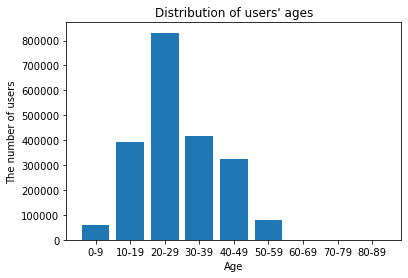

In [11]:
from matplotlib import pyplot as plt

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
data['age_range'] = pd.cut(x = data["age"], bins = age_bins, labels=["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89"])
x = ["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89"]
y = [data['age_range'].value_counts()[label] for label in x]
plt.bar(x, y)
plt.title("Distribution of users' ages")
plt.ylabel('The number of users')
plt.xlabel('Age');
plt.show()

This is the distribution of users' ages. We can see that there is no data from people who are elder than 60 years old. And the largest amount of users were in the age group 20-29.